In [43]:
#This code snipped solves heat equation (https://en.wikipedia.org/wiki/Heat_equation) 
#in some special form:
# - homogenous
# - zero boundary conditions: U(0, t) = U(l, t) = 0


x, t, n = var('x t n')

#input
K = sqrt(1/4); a = 0; b = 2*pi; l = b - a; tmax = 10; approx_to_member = 10
assume(n, 'integer'); assume(n >= 0)
omega = pi / (b - a) * n

U_0 = x*sin(x)*cos(x)
show("Initial heat distribution (U_0):\t", U_0)
INIT_plot = plot3d(U_0, (x, a, b), (t, -0.05, 0), color='red')

#Continuation U_0 to odd piecewise function on [a-l, a+l]
U_0 = piecewise([((a-l, a), -U_0(-x)), ((a, a + l), U_0(x))])

#It is known, that cosine Fourier coefficients (B_n) of odd function = 0
print("Fourier coefficients of U_0: ")
show("A_n = ", [U_0.fourier_series_sine_coefficient(n) for n in range(5)])
show("B_n = ", [U_0.fourier_series_cosine_coefficient(n) for n in range(5)])

#Compute approximated (to approx_to_member) solution

Ser_members = [U_0.fourier_series_sine_coefficient(n)
     * sin(omega(n=n)*x) 
     * exp(- K^2 * (omega(n=n))^2 * t) for n in range(approx_to_member)]
Sol = sum(Ser_members)

#output
show("Solution:\t", Sol)
SOL_plot = plot3d(Sol, (x, a, b), (t, 0, tmax),  adaptive=True, color=rainbow(256, 'rgbtuple'))
show(INIT_plot + SOL_plot)
#save(INIT_plot + SOL_plot, "homogenous_and_zero_boundary.png")

print("Fourier sine coefficients of U_0 (numerical approximation): ") 
for n in range(approx_to_member):
    print(numerical_approx(U_0.fourier_series_sine_coefficient(n)))
              


'Initial heat distribution (U_0):\t' x*cos(x)*sin(x)

Fourier coefficients of U_0: 


'A_n = ' [0, -32/225/pi, 0, -96/49/pi, 1/2*pi]

'B_n = ' [0, 0, 0, 0, 0]

'Solution:\t' 1/2*pi*e^(-t)*sin(2*x) - 288/4225*e^(-81/16*t)*sin(9/2*x)/pi - 224/1089*e^(-49/16*t)*sin(7/2*x)/pi - 160/81*e^(-25/16*t)*sin(5/2*x)/pi - 96/49*e^(-9/16*t)*sin(3/2*x)/pi - 32/225*e^(-1/16*t)*sin(1/2*x)/pi

Graphics3d Object

Fourier sine coefficients of U_0 (numerical approximation): 
0.000000000000000
-0.0452707393683613
0.000000000000000
-0.623627532115182
1.57079632679490
-0.628760269005019
0.000000000000000
-0.0654742098302747
0.000000000000000
-0.0216978099931199


In [46]:
#Another case:
# - non-homogenous, 
# - zero initial conditions (U_0(x, t) = 0 for all x)
# - zero boundary condition

x, t, tau, n = var('x t tau n')
a = 0; b = 6; l = b-a; omega = (pi/l) * n; approx_to_member= 5; T = 2*pi
f = cos(tau)*sin(x)
show("Non-homogenousity f(x, tau):\t", f)


#F_n = F_n (n, tau, x), T_n = T_n (n, t)
F_n = 2/l * integral(f*sin(omega(n) * x), (x, 0, l))
assume(t > 0)
T_n = integral(exp(-(omega(n)*1*a)^2 * (t - tau)) * F_n(n), (tau, 0, t))

Ser_members = [T_n(n=i) * sin(omega(n=i)*x) for i in range(1, approx_to_member)]
Sol = sum(Ser_members)


#output
show("F_1 = ", F_n)
show("T_1 = ", T_n)
show("Solution =\t", Sol)
plot3d(Sol, (x, a, b), (t, 0, T),  adaptive=True, color=rainbow(256, 'rgbtuple'))

#save(P, "non-homogenous_zero_initial_and_boundary.png", writer='imagemagick',  dpi=1000, figsize=[20, 20])


'Non-homogenousity f(x, tau):\t' cos(tau)*sin(x)

'F_1 = ' -((pi*n - 6)*sin(pi*n + 6) - (pi*n + 6)*sin(pi*n - 6))*cos(tau)/(pi^2*n^2 - 36)

'T_1 = ' -((pi*n - 6)*sin(pi*n + 6) - (pi*n + 6)*sin(pi*n - 6))*sin(t)/(pi^2*n^2 - 36)

'Solution =\t' -1/2*((2*pi - 3)*sin(6) - (2*pi + 3)*sin(-6))*sin(2/3*pi*x)*sin(t)/(4*pi^2 - 9) - 1/3*((pi - 2)*sin(3*pi + 6) - (pi + 2)*sin(3*pi - 6))*sin(1/2*pi*x)*sin(t)/(pi^2 - 4) - 1/2*((pi - 3)*sin(6) - (pi + 3)*sin(-6))*sin(1/3*pi*x)*sin(t)/(pi^2 - 9) - ((pi - 6)*sin(pi + 6) - (pi + 6)*sin(pi - 6))*sin(1/6*pi*x)*sin(t)/(pi^2 - 36)

Graphics3d Object

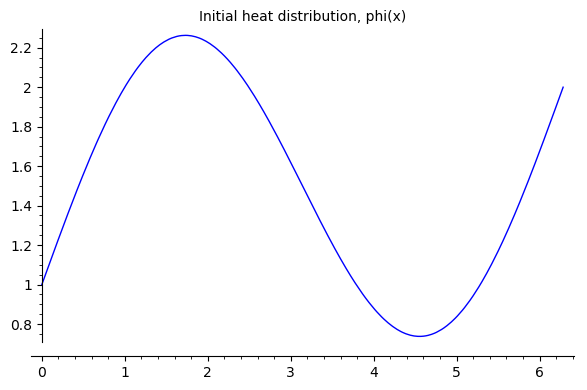

U(x, t) = U_dash(x, t) + v(x, t)


'U_dash =\t' 1/2*x/pi + 1

e^(-1/2*t)*sin(x)

'u = ' e^(-1/2*t)*sin(x) + 1/2*x/pi + 1

Graphics3d Object

In [42]:
#Another case:
# - homogenous
# - constant temparature on bounds (u0, u1)
# - initial condition U()phi(x)
# - [a, b] = [0, l]

x, t, n = var('x t n')
a = 0; b = 2*pi; l = b-a; K = sqrt(1/2); omega = pi/l*n; approx_to_member= 5; T = 5


u0 = 1
u1 = 2
phi = sin(x) + (u1-u0)/(b-a) * x + u0
show(plot(phi, (a, b), title="Initial heat distribution, phi(x)"))

U_dash = u0 + x/l*(u1-u0)
print("U(x, t) = U_dash(x, t) + v(x, t)")
show("U_dash =\t", U_dash)


#=====================solve simplier Heat flow equation (1st snippet)==================================
#input
phi_1 = phi - U_dash
U_0 = phi_1

#homogenous, null conditions
n = var('n')
assume(n, 'integer')
assume(n >= 0)
omega = pi/(b - a) * n

U_0 = piecewise([((a-l, a), -U_0(-x)), ((a, a + l), U_0(x))])
S = [U_0.fourier_series_sine_coefficient(n)
     * sin(omega(n=n)*x) 
     * exp(- K^2 * (omega(n=n))^2 * t) for n in range(approx_to_member)]

#====================================================================================
# output
v = sum(S)
show(v)
#plot3d(v, (x, a, b), (t, 0, T),  adaptive=True, color=rainbow(256, 'rgbtuple'))

U = U_dash + v
show("u = ", U)
plot3d(U, (x, a, b), (t, 0, T),  adaptive=True, color=rainbow(256, 'rgbtuple'))